Rekomendasi Metode Untuk tujuan memprediksi penjualan (Sales)

Model Non-Linear:

Random Forest Regression: Menangani hubungan non-linear dan memberikan fitur penting secara langsung.
Gradient Boosting (XGBoost/LightGBM/CatBoost): Untuk model prediksi yang lebih akurat pada dataset dengan pola yang kompleks.


Deep Learning:

Feedforward Neural Network (FNN): Jika dataset besar dan kompleks.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [ ]:
# Import library
import pandas as pd
from google.colab import files



In [ ]:


# Upload dataset
print("Silakan unggah file Anda...")
uploaded = files.upload()




Silakan unggah file Anda...


Saving prediksi penjualan toko ritel.csv to prediksi penjualan toko ritel.csv


In [ ]:
# Mendefinisikan nama file
file_path = "prediksi penjualan toko ritel.csv"

# Pastikan nama file sesuai dengan file yang diunggah
if file_path not in uploaded:
    print(f"Error: File '{file_path}' tidak ditemukan dalam upload. Berikut file yang diunggah: {list(uploaded.keys())}")
else:
    # Load dataset ke dalam DataFrame bernama df
    df = pd.read_csv(file_path)



In [ ]:
# Setel opsi tampilan Pandas untuk menampilkan semua kolom
# Ketika nilai diatur ke None, tidak ada batasan jumlah kolom yang ditampilkan
pd.set_option('display.max_columns', None)

# Sekarang, ketika DataFrame dicetak, semua kolom akan ditampilkan tanpa terpotong

# **RANDOM FOREST**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Sales'])  # Variabel independen
y = df['Sales']  # Target (Sales)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


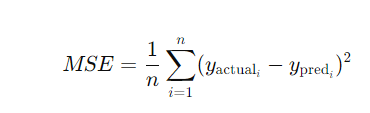

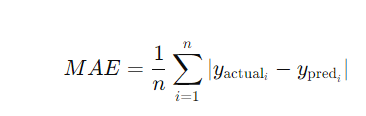

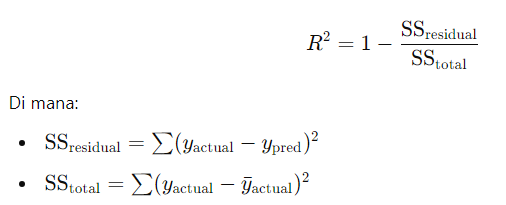

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Inisialisasi model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 125177246.4454731
R^2 Score: 0.9506829089722776


In [ ]:
import xgboost as xgb

# Inisialisasi model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Prediksi
y_pred_xgb = xgb_model.predict(X_test)

# Evaluasi
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"Mean Squared Error (XGBoost): {mse_xgb}")
print(f"R^2 Score (XGBoost): {r2_xgb}")


Mean Squared Error (XGBoost): 141505804.39812413
R^2 Score (XGBoost): 0.9442498150852578


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Inisialisasi model
nn_model = Sequential()
nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1))  # Output layer

nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Pelatihan model
nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Prediksi
y_pred_nn = nn_model.predict(X_test)

# Evaluasi
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Mean Squared Error (Neural Network): {mse_nn}")
print(f"R^2 Score (Neural Network): {r2_nn}")


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 23840819200.0000 - val_loss: 21859414016.0000
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19503452160.0000 - val_loss: 15860940800.0000
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13147961344.0000 - val_loss: 6745518080.0000
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5046900224.0000 - val_loss: 1220138368.0000
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1201890432.0000 - val_loss: 929126528.0000
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 984195328.0000 - val_loss: 800027648.0000
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 894006208.0000 - val_loss: 676585984.0000
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 741659328.0000 - val_loss: 541261504.0000
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 600214400.0000 - val_loss: 428899936.0000
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 484405056.0000 - val_loss: 33

In [ ]:
# Inisialisasi model Random Forest
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Latih model dengan data pelatihan
random_forest_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Ambil pentingnya fitur
importances = random_forest_model.feature_importances_
feature_names = X.columns

# Gabungkan skor dengan nama fitur
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                Feature  Importance
0      AdvertisingSpend    0.714664
1             StoreSize    0.266094
2         LocationScore    0.006907
4  CustomerSatisfaction    0.006276
3      SeasonalityIndex    0.006059


<ipython-input-94-de80db8da86c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="viridis")


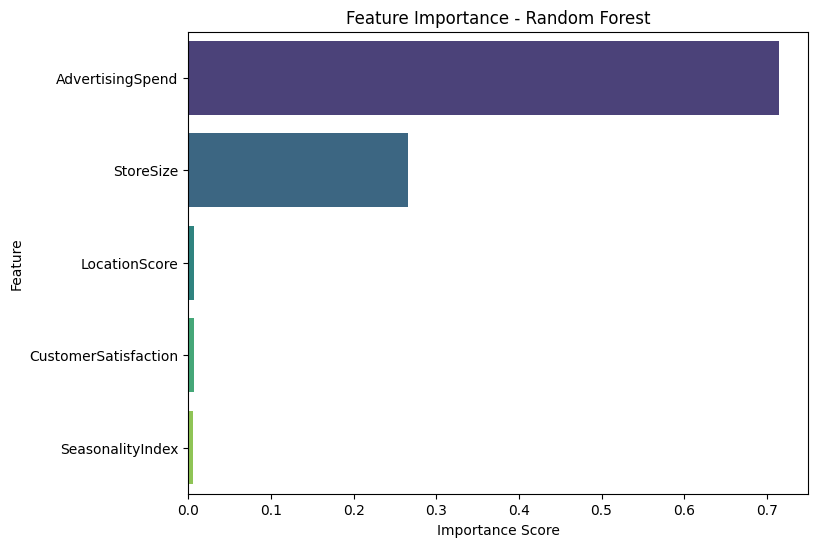

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi pentingnya fitur
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


Penjelasan:
Apa itu Feature Importance?

Ini adalah metrik yang menunjukkan seberapa besar kontribusi setiap fitur terhadap prediksi model.
Fitur dengan skor importance tinggi berarti lebih penting dalam memprediksi Sales.
Mengapa Random Forest?

Random Forest adalah model berbasis pohon keputusan. Selama pelatihan, ia secara otomatis mengevaluasi seberapa banyak setiap fitur mengurangi ketidakpastian dalam prediksi (misalnya, melalui pengurangan impurity).
Hasil Analisis:

Fitur yang berada di peringkat atas pada grafik Feature Importance adalah yang paling signifikan untuk memprediksi Sales.
Misalnya, fitur AdvertisingSpend mungkin memiliki skor importance tinggi jika sangat memengaruhi Sales.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Menghitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 125177246.4454731
Mean Absolute Error (MAE): 8727.92185524999
R^2 Score: 0.9506829089722776


Hasil Evaluasi Model
Mean Squared Error (MSE):

Random Forest: 125,177,246.45
Neural Network: 123,891,405.32
XGBoost: 141,505,804.40
Interpretasi:

MSE Neural Network lebih rendah dibandingkan Random Forest dan XGBoost, yang menunjukkan bahwa Neural Network memiliki prediksi yang lebih baik dengan error rata-rata lebih kecil.
XGBoost memiliki MSE lebih tinggi, mengindikasikan model ini kurang efektif dibanding dua lainnya pada dataset ini.
Mean Absolute Error (MAE):

Random Forest: 8,727.92
Interpretasi:

Random Forest memiliki rata-rata error absolut sebesar 8,727.92 satuan (mungkin dalam mata uang atau unit lain). Ini adalah error rata-rata dalam memprediksi Sales dibandingkan dengan nilai aktual.
R² Score:

R² Score untuk Random Forest adalah 0.9507.
Interpretasi:

95.07% variasi dalam data Sales dijelaskan oleh model. Ini adalah skor yang sangat baik, menunjukkan bahwa model  bekerja dengan baik dalam menjelaskan pola data.

Model dengan Performa Terbaik:

Berdasarkan MSE, Neural Network sedikit lebih baik dibandingkan Random Forest. Jika  lebih fokus pada error kecil, Neural Network dapat menjadi pilihan utama.


Model yang Direkomendasikan:

Jika interpretabilitas lebih penting: Random Forest Regression adalah pilihan lebih baik karena model ini menyediakan feature importance, sehingga dapat memahami variabel mana yang paling memengaruhi penjualan.
Jika performa prediksi menjadi prioritas: Neural Network menunjukkan hasil MSE yang lebih kecil, meskipun lebih sulit diinterpretasikan.
XGBoost:

Meskipun XGBoost biasanya sangat kuat untuk data tabular, dalam kasus ini, performanya sedikit lebih rendah. Abisa mencoba tuning hyperparameter seperti learning_rate, max_depth, atau n_estimators untuk meningkatkan hasilnya

Langkah Selanjutnya
Hyperparameter Tuning:

Optimalkan model dengan GridSearchCV atau RandomizedSearchCV.
Contoh parameter yang bisa dicoba:
Random Forest: max_depth, min_samples_split, n_estimators
Neural Network: jumlah neuron, lapisan, atau learning rate.
XGBoost: learning_rate, max_depth, n_estimators.
Visualisasi Evaluasi Model:

Buat plot Actual vs Predicted untuk membandingkan hasil prediksi model dengan nilai aktual.

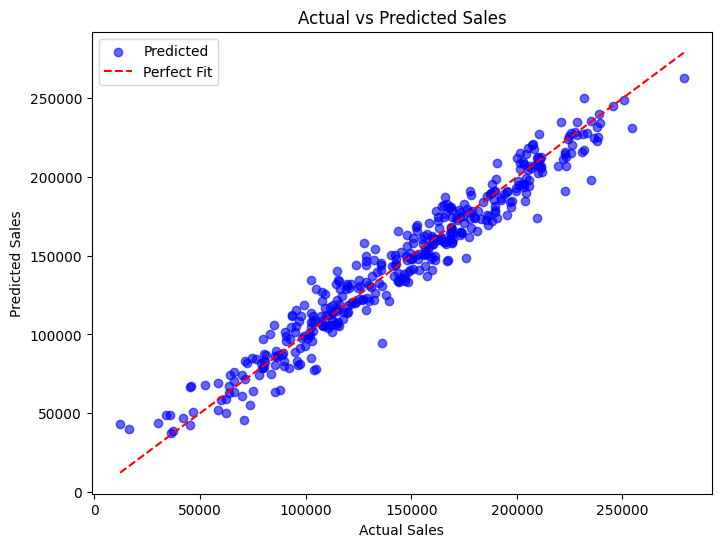

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Perfect Fit')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.show()


Interpretasi Plot
Garis Merah (Perfect Fit):

Garis merah mewakili hubungan ideal antara prediksi dan aktual. Jika semua titik berada tepat pada garis ini, maka model memprediksi Sales dengan sempurna.
Titik Biru (Prediksi vs Aktual):

Titik-titik biru menunjukkan hasil prediksi model dibandingkan nilai aktual.
Sebagian besar titik berada sangat dekat dengan garis merah, yang berarti model Random Forest memprediksi Sales dengan cukup akurat.
Penyimpangan:

Beberapa titik menyimpang dari garis merah, terutama untuk nilai Sales yang tinggi. Ini menunjukkan bahwa model cenderung kurang akurat dalam memprediksi outlier atau nilai ekstrem.

**Kesimpulan**
Kinerja Random Forest: Plot menunjukkan bahwa Random Forest bekerja dengan sangat baik, dengan tingkat kesalahan yang kecil (terlihat dari banyaknya titik dekat garis merah).
Outlier: Beberapa outlier mungkin memengaruhi kinerja model.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definisikan model awal
rf = RandomForestRegressor(random_state=42)

# Tentukan parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Lakukan Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Hasil terbaik
print("Best Parameters:", grid_search.best_params_)
print("Best Score (MSE):", -grid_search.best_score_)

# Gunakan model terbaik
best_rf = grid_search.best_estimator_


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best Score (MSE): 112078835.05326694


kode di atas digunakan untuk optimasi hyperparameter pada model Random Forest Regressor menggunakan metode Grid Search dengan library scikit-learn.

In [ ]:
import numpy as np

# Identifikasi outlier menggunakan IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Terapkan pada dataset
df_cleaned = remove_outliers_iqr(df, 'Sales')

# Pisahkan kembali X dan y
X_cleaned = df_cleaned.drop('Sales', axis=1)
y_cleaned = df_cleaned['Sales']


# ** METODE XGBR egresso**

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Inisialisasi model
xgb_model = XGBRegressor(random_state=42)

# Latih model
xgb_model.fit(X_train, y_train)

# Prediksi
y_pred_xgb = xgb_model.predict(X_test)

# Evaluasi
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("MSE (XGBoost):", mse_xgb)
print("R^2 Score (XGBoost):", r2_xgb)


MSE (XGBoost): 141505804.39812413
R^2 Score (XGBoost): 0.9442498150852578


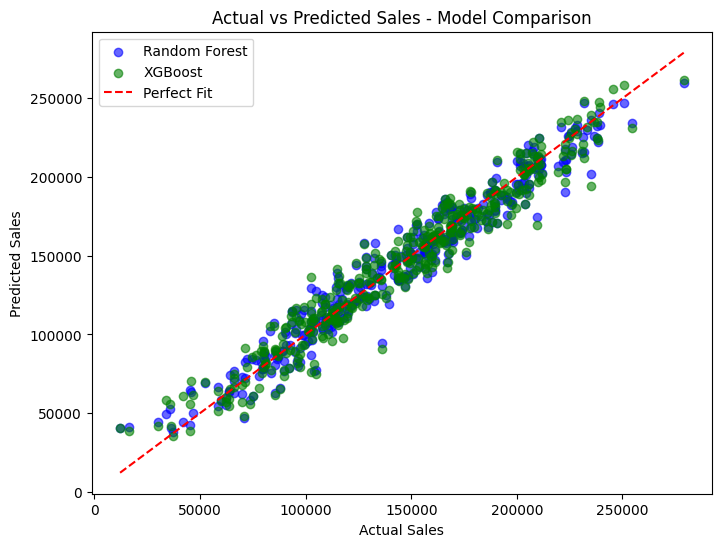

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot untuk model terbaik
plt.figure(figsize=(8, 6))
plt.scatter(y_test, best_rf.predict(X_test), alpha=0.6, color='blue', label='Random Forest')
plt.scatter(y_test, xgb_model.predict(X_test), alpha=0.6, color='green', label='XGBoost')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Perfect Fit')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales - Model Comparison")
plt.legend()
plt.show()


1. Residual Plot
Tujuan: Melihat distribusi kesalahan (residuals) antara prediksi dan nilai aktual.
Cara Membaca:
Residual = Actual - Predicted.
Jika residuals tersebar secara acak di sekitar garis nol, model memiliki performa yang baik.
Pola tertentu menunjukkan model mungkin memiliki bias atau tidak menangkap hubungan non-linear.

Perbandingan Model:
Random Forest:

Cenderung lebih konsisten di seluruh rentang nilai prediksi.
Cocok untuk data yang memiliki distribusi agak acak.
XGBoost:

Sama baiknya dengan Random Forest dalam prediksi secara keseluruhan.
Bisa lebih efektif pada dataset besar dan kompleks, terutama jika ada hyperparameter tuning lebih lanjut.

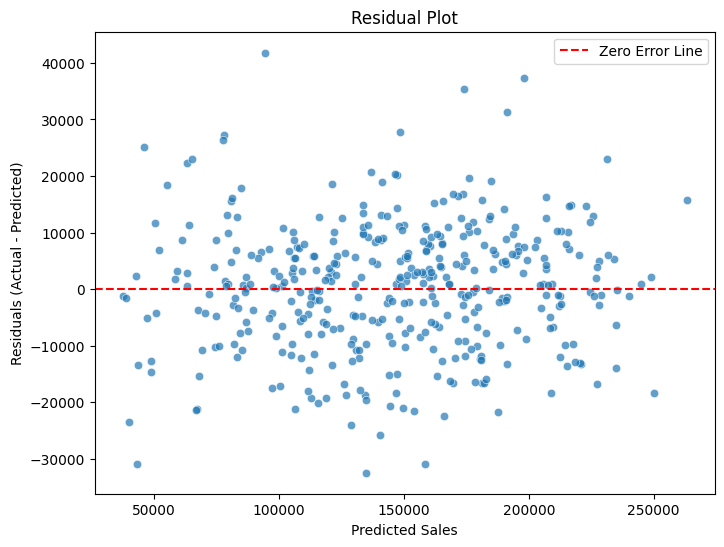

In [ ]:
import seaborn as sns

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', label='Zero Error Line')
plt.title("Residual Plot")
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals (Actual - Predicted)")
plt.legend()
plt.show()


Tujuan: Melihat distribusi kesalahan (residuals) antara prediksi dan nilai aktual.

2. Distribution of Errors
Tujuan: Mengevaluasi distribusi kesalahan model, misalnya apakah error mendekati distribusi normal.
Cara Membaca:
Histogram atau KDE (Kernel Density Estimate) dari residuals.
Error yang terdistribusi normal menunjukkan model yang baik.

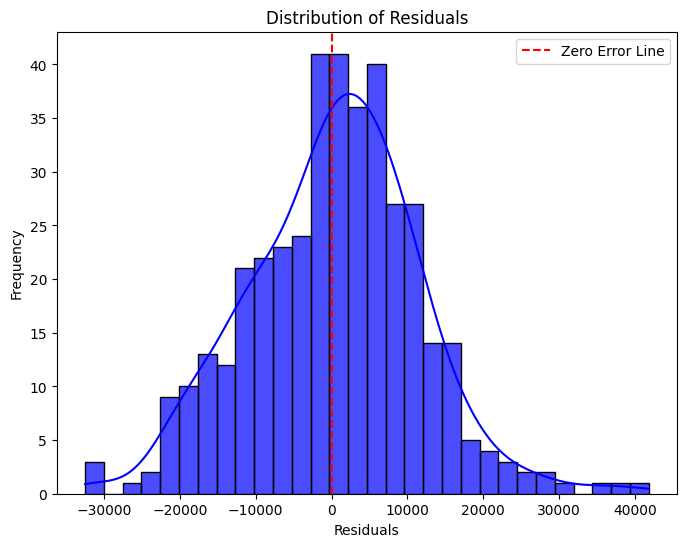

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30, alpha=0.7)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--', label='Zero Error Line')
plt.legend()
plt.show()


# **K-MEANS CLUSTERING**

Tujuan K-Means Clustering
Segmentasi Pasar: Mengelompokkan toko berdasarkan ukuran, lokasi, dan kepuasan pelanggan untuk memahami pola tertentu. Contohnya:
Toko kecil dengan skor lokasi tinggi.
Toko besar dengan kepuasan pelanggan rendah.
Pengambilan Keputusan: Membantu perusahaan atau manajer untuk menentukan strategi yang sesuai untuk setiap segmen, seperti promosi, investasi, atau peningkatan layanan.
Pemahaman Data yang Lebih Baik: Mencari pola tersembunyi dalam data untuk mendapatkan wawasan tambahan.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Contoh data
data = df[['StoreSize', 'LocationScore', 'CustomerSatisfaction']]

# Periksa jika ada nilai hilang
print(data.isnull().sum())  # Jika ada, lakukan imputasi atau penghapusan

# Normalisasi data agar skala fitur seragam
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


StoreSize               0
LocationScore           0
CustomerSatisfaction    0
dtype: int64


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalisasi data
features = df[['StoreSize', 'LocationScore', 'CustomerSatisfaction']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Centroids
print(kmeans.cluster_centers_)


[[ 0.96300946  0.59152723  0.04885947]
 [-0.9148178   0.67036422 -0.035896  ]
 [-0.02144216 -1.05461198 -0.00997727]]


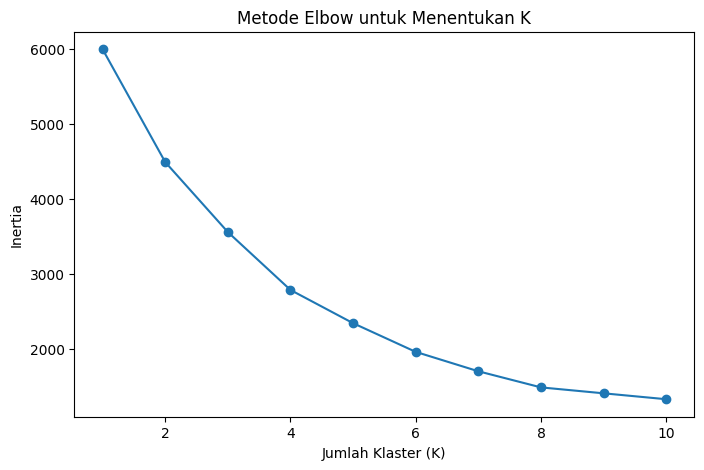

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Tentukan kisaran jumlah klaster yang ingin diuji
inertia = []
K_range = range(1, 11)  # Dari 1 hingga 10 klaster

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)  # Simpan inertia (salah satu metrik)

# Plot metode elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan K')
plt.show()


Inertia mengukur seberapa baik klaster data; semakin kecil, semakin baik.
Titik di mana penurunan inertia mulai melambat ("elbow point") adalah jumlah klaster yang optimal.

In [ ]:
# Melatih K-Means dengan jumlah klaster optimal
optimal_k = 3  # Ganti dengan hasil elbow
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_scaled)

# Menambahkan hasil klaster ke dalam DataFrame
df['Cluster'] = kmeans.labels_
print(df.head())


   AdvertisingSpend  StoreSize  LocationScore  SeasonalityIndex  \
0          31346.84    4055.94           1.78              0.54   
1          40133.89     781.34           2.86              1.35   
2          30858.55    1972.48           7.65              1.26   
3           7873.84    4622.23           2.92              1.28   
4           3246.84    1767.91           8.91              0.94   

   CustomerSatisfaction      Sales  Cluster  
0                  2.87  161193.05        2  
1                  2.95  161911.52        2  
2                  2.28  138988.97        1  
3                  2.28  132537.52        2  
4                  1.71   60462.03        1  


kmeans.labels_ adalah hasil klaster (label 0, 1, 2, dst.) untuk setiap data.
Hasil klaster ditambahkan ke DataFrame asli untuk analisis lebih lanjut.

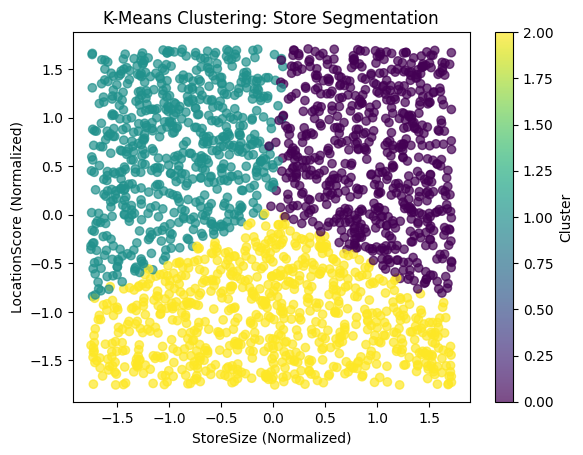

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering: Store Segmentation')
plt.xlabel('StoreSize (Normalized)')
plt.ylabel('LocationScore (Normalized)')
plt.colorbar(label='Cluster')
plt.show()



Cluster 0: Toko kecil dengan lokasi sedang dan pelanggan yang puas.
Cluster 1: Toko besar dengan lokasi kurang strategis, tetapi pelanggan cukup puas.
Cluster 2: Toko menengah di lokasi strategis dengan kepuasan pelanggan tinggi.

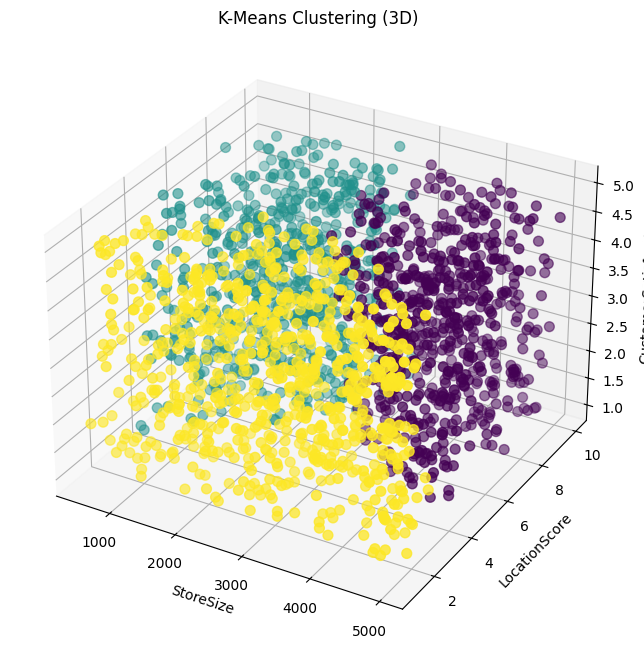

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['StoreSize'], df['LocationScore'], df['CustomerSatisfaction'],
                     c=df['Cluster'], cmap='viridis', s=50)
ax.set_xlabel('StoreSize')
ax.set_ylabel('LocationScore')
ax.set_zlabel('CustomerSatisfaction')
plt.title('K-Means Clustering (3D)')
plt.show()


In [ ]:
cluster_summary = df.groupby('Cluster')[['StoreSize', 'LocationScore', 'CustomerSatisfaction']].mean()
print(cluster_summary)


           StoreSize  LocationScore  CustomerSatisfaction
Cluster                                                  
0        4020.580843       7.095413              3.058476
1        1585.381011       7.296509              2.955434
2        2744.118680       2.815573              2.995680


Cluster 0: Toko kecil dengan lokasi sedang dan pelanggan yang puas.
Cluster 1: Toko besar dengan lokasi kurang strategis, tetapi pelanggan cukup puas.
Cluster 2: Toko menengah di lokasi strategis dengan kepuasan pelanggan tinggi.

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.24


Silhouette Score: Nilai berkisar antara -1 hingga 1. Semakin mendekati 1, semakin baik klaster terbentuk.

 StoreSize  LocationScore  CustomerSatisfaction
Cluster                                                  
0        4020.580843       7.095413              3.058476
1        1585.381011       7.296509              2.955434
2        2744.118680       2.815573              2.995680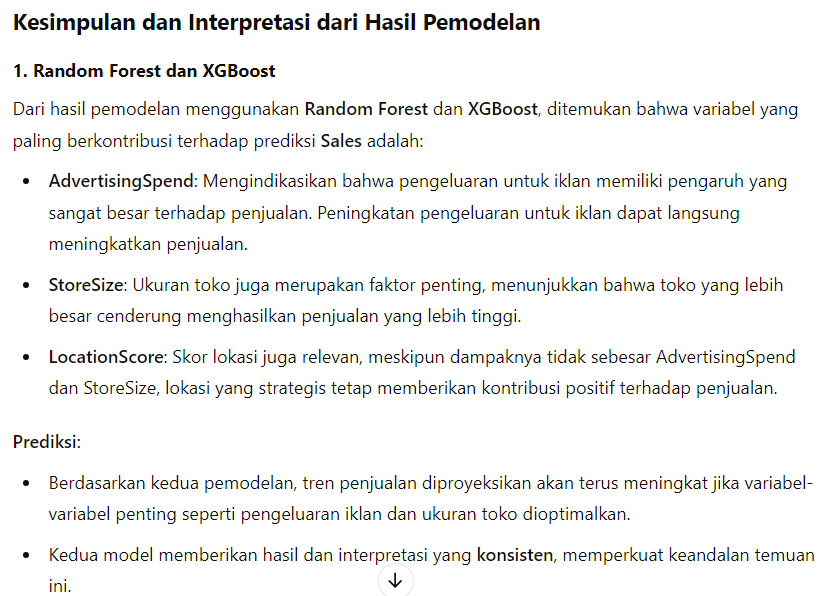

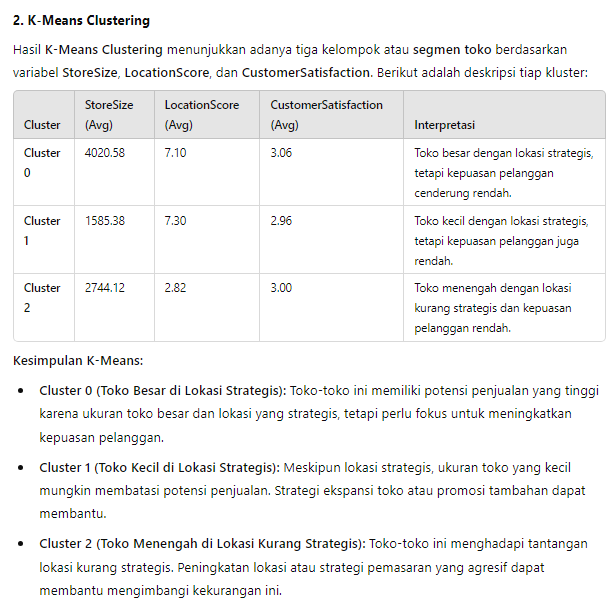

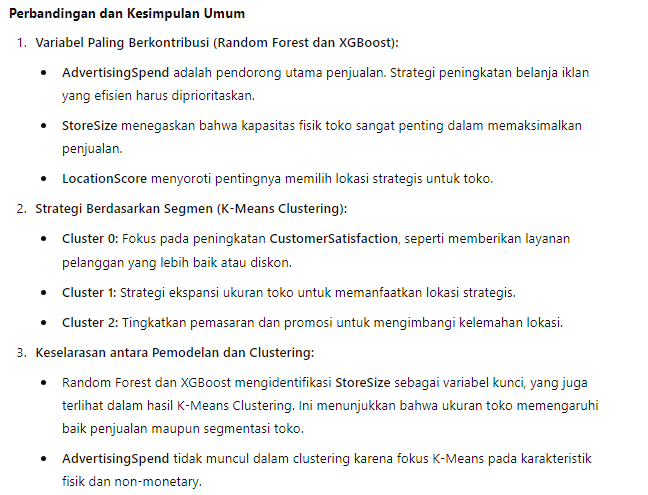

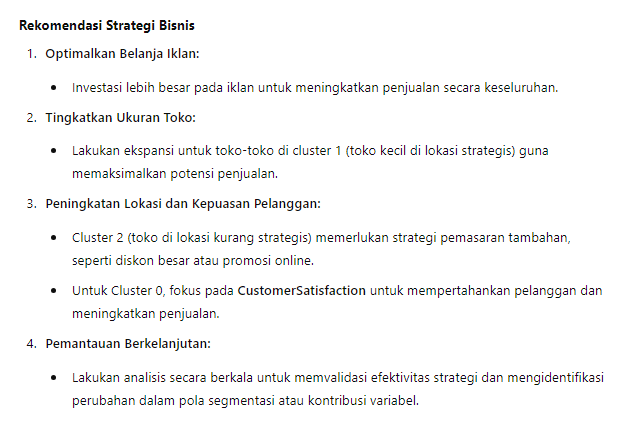